In [1]:
import pandas as pd

In [2]:
pandas_df=pd.read_csv('final_data.csv')

In [3]:
import matplotlib.pyplot as plt

In [10]:
pandas_df.columns

Index(['Unnamed: 0', 'year', 'month', 'is_male', 'weight_pounds', 'plurality',
       'apgar_5min', 'mother_age', 'gestation_weeks', 'cigarette_use',
       'alcohol_use', 'weight_gain_pounds', 'ever_born', 'father_age',
       'baby_alive'],
      dtype='object')

In [7]:
male_count=pandas_df[pandas_df["is_male"]==False].shape[0]
female_count=pandas_df[pandas_df["is_male"]==True].shape[0]
years=pandas_df['year'].unique()
years

array([2005, 2006, 2007, 2008, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004])

/tmp/ipykernel_17309/2402232983.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


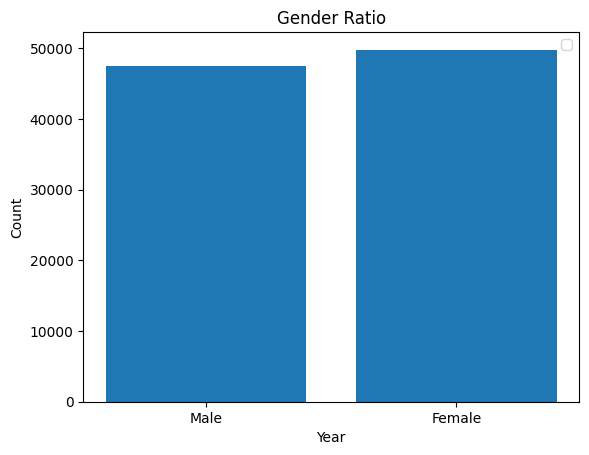

In [13]:
plt.bar(["Male", "Female"], [male_count, female_count])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Gender Ratio")
plt.legend()
plt.show()

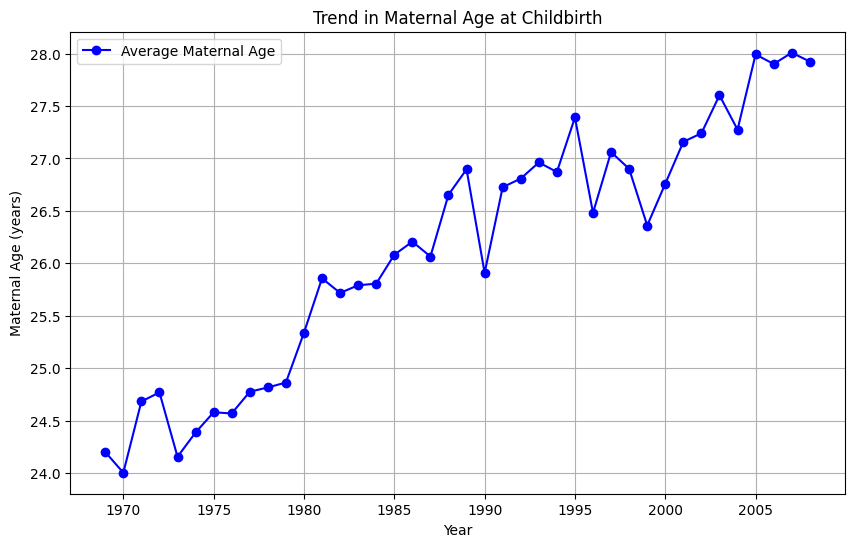

In [20]:


# Assuming your data is in a DataFrame named 'df'

# Group the data by year and calculate the mean maternal age
df_grouped = pandas_df.groupby('year')['mother_age'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['year'], df_grouped['mother_age'], marker='o', color='blue', linestyle='-', label='Average Maternal Age')
plt.xlabel('Year')
plt.ylabel('Maternal Age (years)')
plt.title('Trend in Maternal Age at Childbirth')
plt.grid(True)
plt.legend()
plt.show()


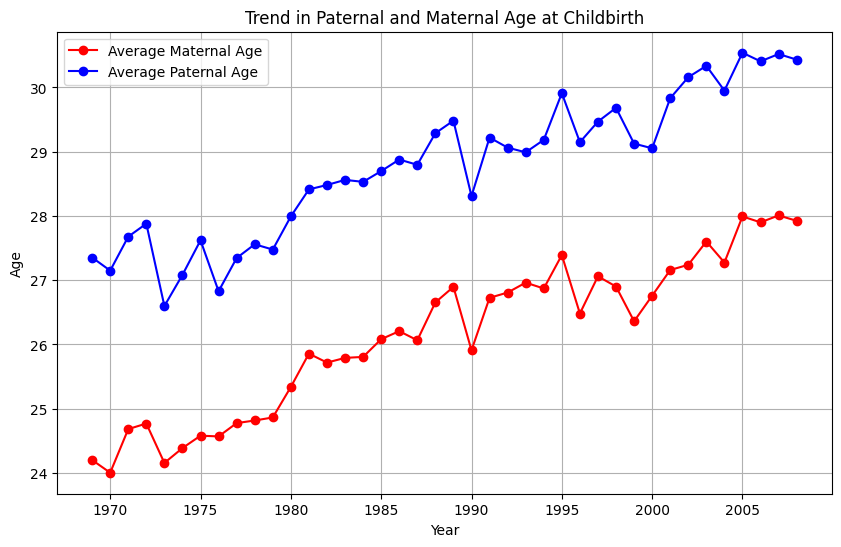

In [28]:
#Paternal age trends: Study how the average age of fathers has changed over time.

# Group the data by year and calculate the mean paternal age
df_grouped = pandas_df.groupby('year')['father_age'].mean().reset_index()
df_grouped_mother = pandas_df.groupby('year')['mother_age'].mean().reset_index()
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_mother['year'], df_grouped_mother['mother_age'], marker='o', color='red', linestyle='-', label='Average Maternal Age')
plt.plot(df_grouped['year'], df_grouped['father_age'], marker='o', color='blue', linestyle='-', label='Average Paternal Age')
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Trend in Paternal and Maternal Age at Childbirth')
plt.grid(True)
plt.legend()
plt.show()


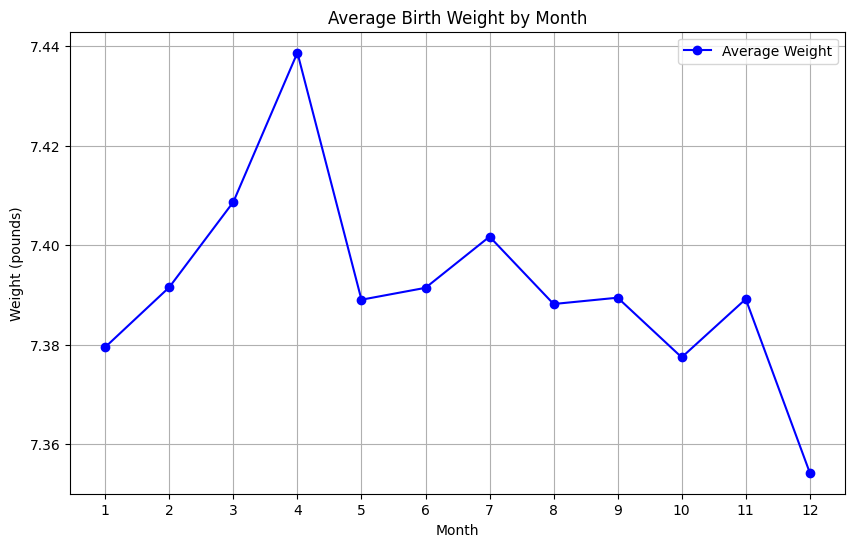

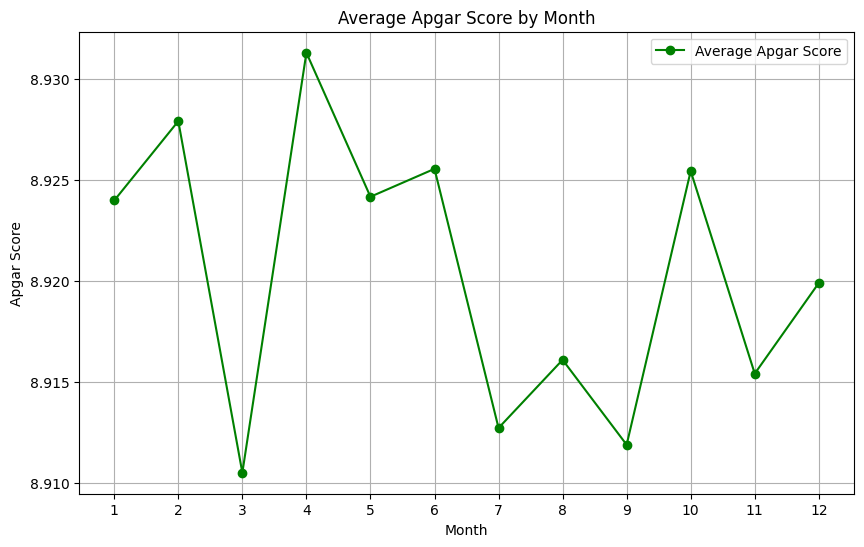

In [31]:

monthly_stats = pdf.groupby('month')[['weight_pounds', 'apgar_5min']].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_stats.index, monthly_stats['weight_pounds'], marker='o', linestyle='-', color='blue', label='Average Weight')
plt.xlabel('Month')
plt.ylabel('Weight (pounds)')
plt.title('Average Birth Weight by Month')
plt.xticks(range(1, 13))  # Set x-axis ticks to months
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_stats.index, monthly_stats['apgar_5min'], marker='o', linestyle='-', color='green', label='Average Apgar Score')
plt.xlabel('Month')
plt.ylabel('Apgar Score')
plt.title('Average Apgar Score by Month')
plt.xticks(range(1, 13))  # Set x-axis ticks to months
plt.grid(True)
plt.legend()
plt.show()


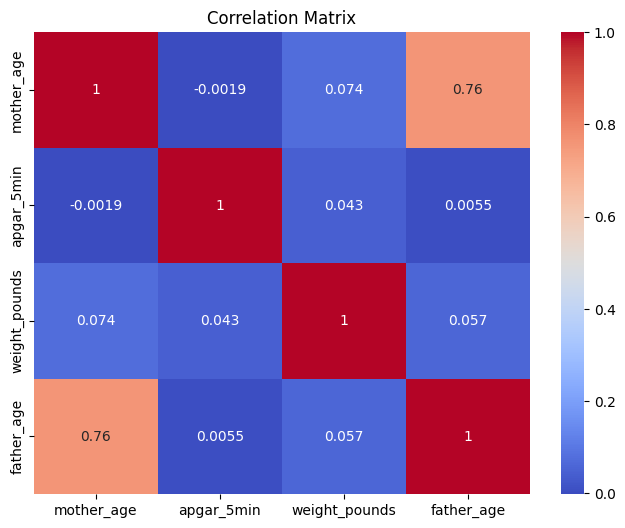

In [40]:
import seaborn as sns


correlation_data = pandas_df[['mother_age', 'apgar_5min','weight_pounds', 'father_age']]  # Add more columns as needed

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


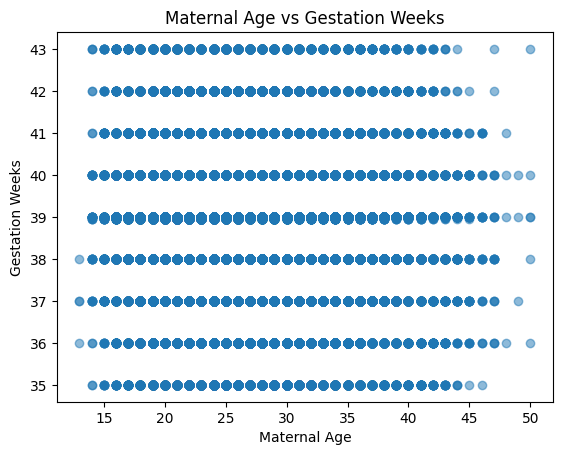

Correlation between maternal age and gestation weeks: -0.0691937584074735


In [33]:
#how gestation weeks are related to mother's age
plt.scatter(pandas_df['mother_age'], pandas_df['gestation_weeks'], alpha=0.5)
plt.xlabel('Maternal Age')
plt.ylabel('Gestation Weeks')
plt.title('Maternal Age vs Gestation Weeks')
plt.show()


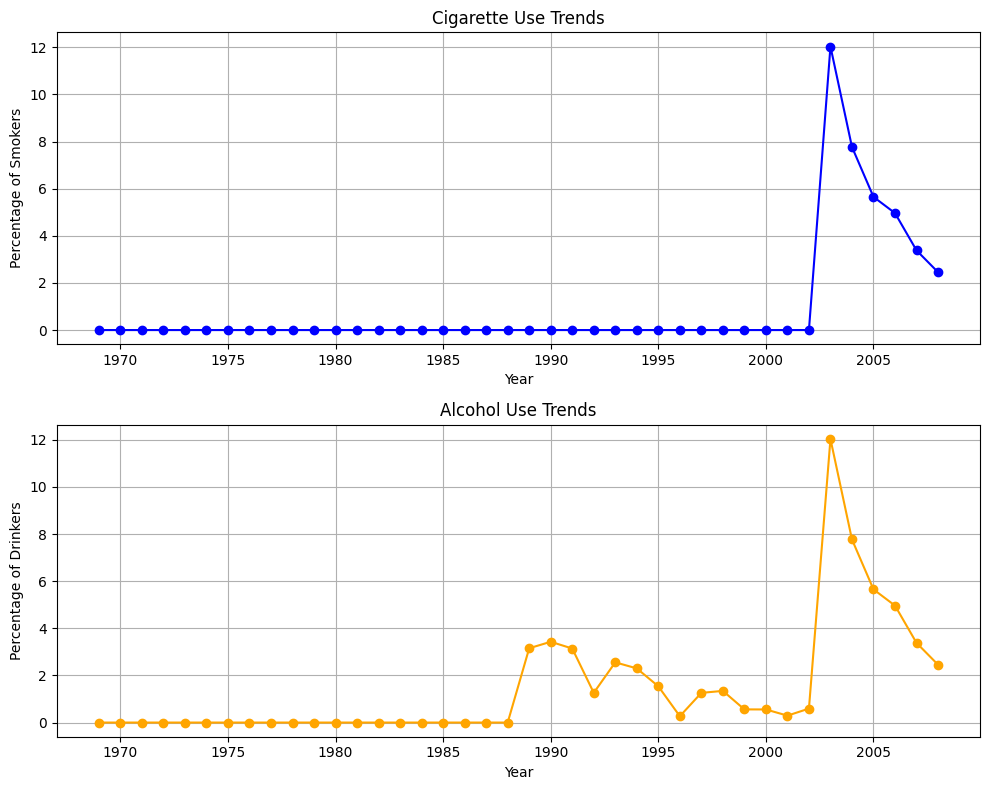

In [49]:
#how substance has changes over the course of years
df_grouped = pandas_df.groupby('year')[['cigarette_use', 'alcohol_use']].mean() * 100

df_grouped = df_grouped.reset_index()

fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

axes[0].plot(df_grouped['year'], df_grouped['cigarette_use'], marker='o', linestyle='-', color='blue', label='Cigarette Use')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage of Smokers')
axes[0].set_title('Cigarette Use Trends')
axes[0].grid(True)

axes[1].plot(df_grouped['year'], df_grouped['alcohol_use'], marker='o', linestyle='-', color='orange', label='Alcohol Use')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage of Drinkers')
axes[1].set_title('Alcohol Use Trends')
axes[1].grid(True)

plt.tight_layout()
plt.show()


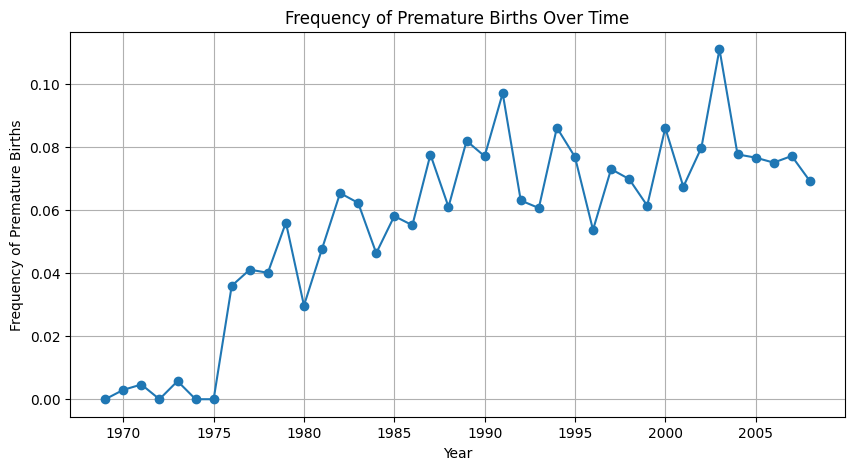

In [43]:
pandas_df['premature'] = pandas_df['gestation_weeks'] < 37
 
premature_frequency_by_year = pandas_df.groupby('year')['premature'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(premature_frequency_by_year['year'], premature_frequency_by_year['premature'], marker='o')
plt.title('Frequency of Premature Births Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency of Premature Births')
plt.grid(True)
plt.show()